### Оценки для параметров

$U[0, \theta]$: $\hat\theta = ((k + 1)\overline{x^k})^{\frac{1}{k}}$

$\text{Exp}(\theta): \hat\theta = \left(\frac{\overline{x^k}}{k!}\right)^{\frac{1}{k}}$


In [1]:
import numpy as np
from numpy.random import seed, uniform, exponential
from math import factorial

In [2]:
def est_unif(x, k):
    n = len(x)
    return pow(sum(x**k) * (k + 1) / n, 1 / k)


def est_exp(x, k):
    n = len(x)
    return pow(sum(x**k) / n / factorial(k), 1 / k)


def deviation(x):
    n = len(x)
    return sum((x - 1)**2 / n)

In [3]:
#seed(0)
n = 100
s = 100
xs_uniform = [uniform(size=n) for i in range(s)]
xs_exp = [exponential(size=n) for i in range(s)]

ks = [i for i in range(1, 100)]

unif_estimates = [np.array([est_unif(xs, k) for xs in xs_uniform]) for k in ks]
exp_estimates = [np.array([est_exp(xs, k) for xs in xs_exp]) for k in ks]

unif_devs = [deviation(estim) for estim in unif_estimates]
exp_devs = [deviation(estim) for estim in exp_estimates]

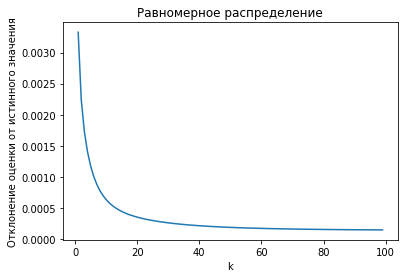

In [4]:
import matplotlib.pyplot as plt

plt.plot(ks, unif_devs)
plt.title('Равномерное распределение')
plt.xlabel('k')
plt.ylabel('Отклонение оценки от истинного значения')
plt.savefig('uniform.png')

plt.show()

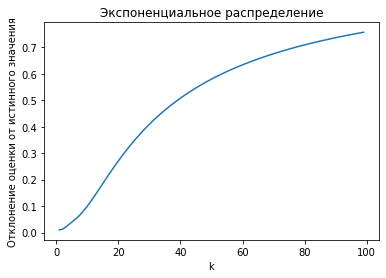

In [5]:
plt.plot(ks, exp_devs)
plt.title('Экспоненциальное распределение')
plt.xlabel('k')
plt.ylabel('Отклонение оценки от истинного значения')
plt.savefig('exp.png')

plt.show()

### Вывод

При использовании метода для оценки параметра распределения $U[0, \theta]$ оценка получается тем эффективнее, чем больше $k \in \mathbb{N}$, в пробной фукции $g(x) = x^k$. Оценка параметра распределения $\rm Exp(\theta)$ наоборот тем эффективнее, чем $k$ меньше. 